In [1]:
import pandas as pd
import numpy as np
import pandas_profiling
import scipy.stats as stats
import math
import matplotlib.pyplot as plt
df = pd.read_csv('data.csv')
# top20 = df.nlargest(20,['metric_value'])
df = df[df.metric_value > 100]
df = df[df['metric_name'].str.contains('accounts')]
df = df.groupby('metric_name').filter(lambda x: len(x) >= 500)
count = df['metric_name'].value_counts().head(40) 
print(count)


google.accounts:num_users                                      1577
google.accounts:num_suspended_users                            1577
google.accounts:num_30day_logins                               1577
google.accounts:num_1day_logins                                1577
google.accounts:num_users_2sv_not_enrolled_and_not_enforced    1577
google.accounts:num_disabled_accounts                          1577
google.accounts:num_7day_logins                                1577
google.accounts:num_users_2sv_not_enforced                     1577
google.accounts:num_users_2sv_not_enrolled                     1577
google.accounts:num_authorized_apps                            1542
google.accounts:gmail_used_quota_in_mb                         1490
google.accounts:drive_used_quota_in_mb                         1490
google.accounts:gplus_photos_used_quota_in_mb                  1490
google.accounts:used_quota_in_mb                               1490
google.accounts:num_users_less_secure_apps_acces

In [2]:
df1= df[df.metric_name == 'google.accounts:gmail_used_quota_in_mb']
df1= df1['metric_value']
df30= df[df.metric_name == 'google.accounts:drive_used_quota_in_mb']
df30= df30['metric_value']


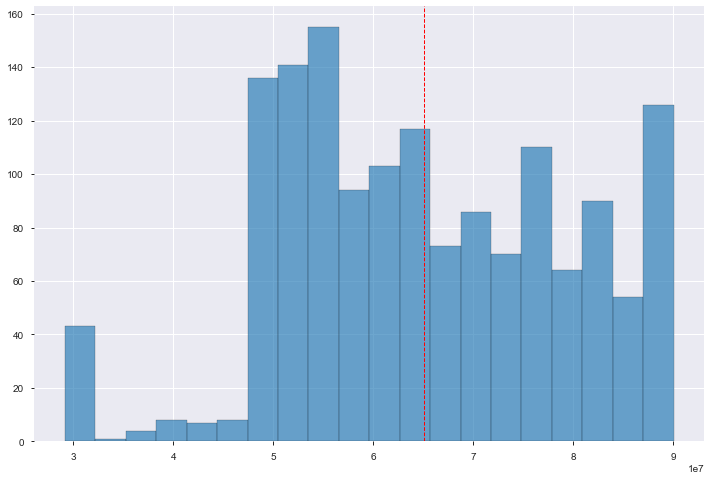

In [3]:
plt.figure(figsize=(12,8))
plt.hist(df1, bins=20, edgecolor='k', alpha=0.65)
plt.axvline(df1.mean(), color='r', linestyle='dashed', linewidth=1) 

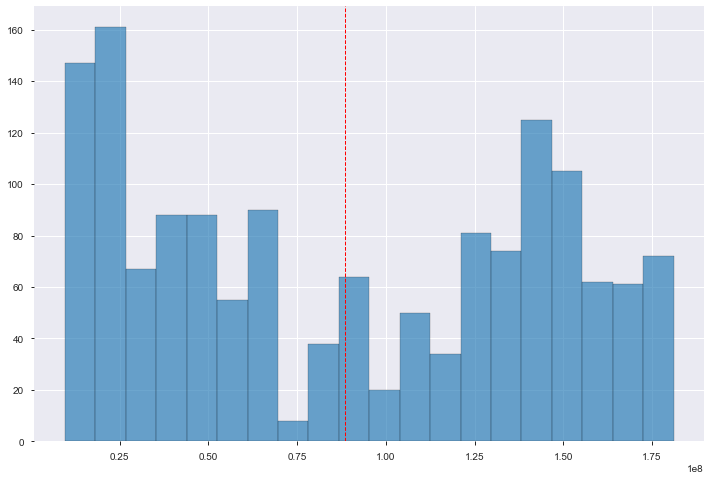

In [4]:
plt.figure(figsize=(12,8))
plt.hist(df30, bins=20, edgecolor='k', alpha=0.65)
plt.axvline(df30.mean(), color='r', linestyle='dashed', linewidth=1)

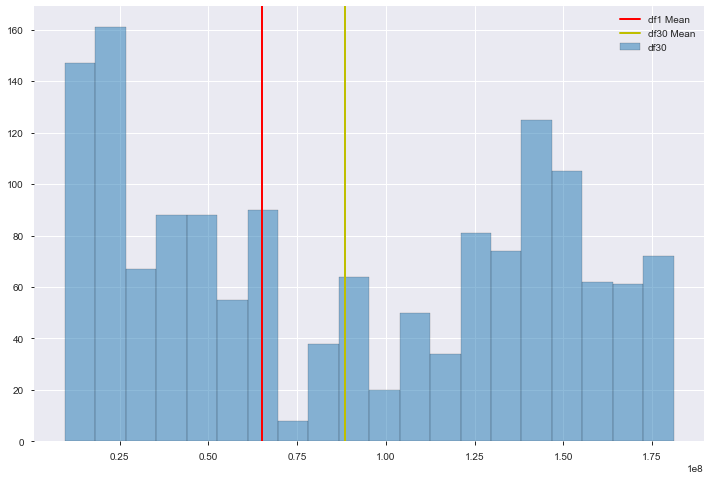

In [5]:
plt.figure(figsize=(12,8))

plt.hist(df30, bins=20, edgecolor='k', alpha=0.5, label='df30')
plt.axvline(df1.mean(), color='r', linewidth=2, label='df1 Mean') 
plt.axvline(df30.mean(), color='y',  linewidth=2, label='df30 Mean') 
plt.legend(loc='upper right')
plt.show()

In [6]:
stats.ttest_1samp(a= df30, popmean= df1.mean())

Ttest_1sampResult(statistic=16.337355298449687, pvalue=2.5775440597091544e-55)

In [7]:
stats.t.ppf(q=0.025, df=49)

-2.0095752344892093

In [8]:
sigma = df30.std()/math.sqrt(1577)  # Sample stdev/sample size

stats.t.interval(0.95,                        # Confidence level
                 df = 49,                     # Degrees of freedom
                 loc = df30.mean(), # Sample mean
                 scale= sigma)  

(85788003.64735247, 91413905.47479518)

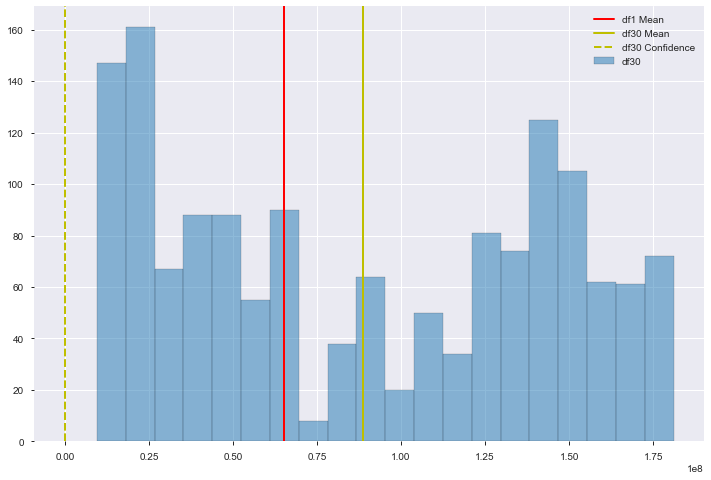

In [9]:
plt.figure(figsize=(12,8))

plt.hist(df30, bins=20, edgecolor='k', alpha=0.5, label='df30')
plt.axvline(df1.mean(), color='r', linewidth=2, label='df1 Mean') 
plt.axvline(df30.mean(), color='y',  linewidth=2, label='df30 Mean')
plt.axvline(36.36, color='y', linestyle='dashed', linewidth=2, label='df30 Confidence')
plt.axvline(42.15, color='y', linestyle='dashed', linewidth=2)
plt.legend(loc='upper right')
plt.show()